In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math, seaborn

In [2]:
train = pd.read_csv('repaired.csv')

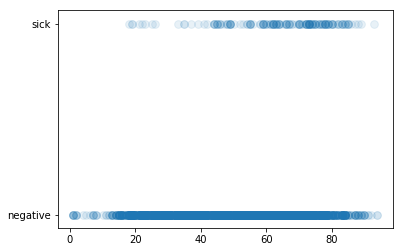

In [3]:
plt.scatter(train['age'], train['class'], alpha=0.1, s=60)

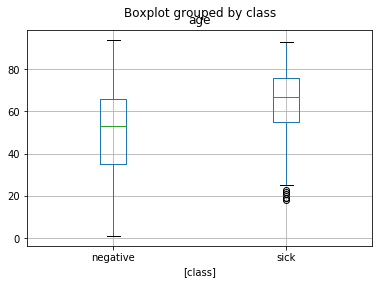

In [4]:
train[['class', 'age']].boxplot(by='class')

Na základe týchto distribúcii sa dá povedať, že od 55 rokov do 85 majú ľudia najčastejšie chorobu

### Na základe dole uvádzaných atribútov zisťujeme ich pomery ku chorobe, ktoré sa budú môcť použiť pre pravidlá.<br>Čím sú počty t a f rôznejšie, tým môže byť výpočet menej dôveryhodný kvôli náhode. 

# query on thyroxin

In [5]:
pom = pd.crosstab(index=train["query on thyroxine"], columns=train["class"])
pom.index= ["f","t"]
print((pom['sick']['t'] / pom['negative']['t'])/(pom['sick']['f'] / pom['negative']['f']))
pom

1.7245508982035929


class  negative  sick
f          2592   167
t            36     4

#### Tí, čo majú theroxin true, sú náchylnejší k chorobe o 72% v porovnaní s f, [40] t

# on antithyroid medication

In [6]:
pom = pd.crosstab(index=train["on antithyroid medication"], columns=train["class"])
pom.index= ["f","t"]
pom

class  negative  sick
f          2594   171
t            34     0

#### Ľudia ktorí sa liečia na antithyroid, niesú chorý, [34] t

# sick

In [7]:
pom = pd.crosstab(index=train["sick"], columns=train["class"])
pom.index= ["f","t"]
print((pom['sick']['t'] / pom['negative']['t'])/(pom['sick']['f'] / pom['negative']['f']))
pom

3.242966751918159


class  negative  sick
f          2536   153
t            92    18

#### Tí, čo sú sick, sú náchylnejší k chorobe až o 224% v porovnaní s f, [110] t

# pregnant

In [8]:
pom = pd.crosstab(index=train["pregnant"], columns=train["class"])
pom.index= ["f","t"]
pom

class  negative  sick
f          2587   171
t            41     0

#### Tehotné ženy nemajú chorobu, [41] t

# thyroid surgery

In [9]:
pom = pd.crosstab(index=train["thyroid surgery"], columns=train["class"])
pom.index= ["f","t"]
pom

class  negative  sick
f          2589   171
t            39     0

#### Ľudia s thyroid surgery niesú chorý, [39] t

# I131 treatment

In [10]:
pom = pd.crosstab(index=train["I131 treatment"], columns=train["class"])
pom.index= ["f","t"]
print((pom['sick']['f'] / pom['negative']['f'])/(pom['sick']['t'] / pom['negative']['t']))
pom

3.095699341340566


class  negative  sick
f          2581   170
t            47     1

#### Tí čo sa neliečia na I131, majú 209% väčšiu náchylnosť k chorobe v porovnaní s t, [48] t

# query hypothyroid

In [11]:
pom = pd.crosstab(index=train["query hypothyroid"], columns=train["class"])
pom.index= ["f","t"]
print((pom['sick']['t'] / pom['negative']['t'])/(pom['sick']['f'] / pom['negative']['f']))
pom

2.3016718380956793


class  negative  sick
f          2485   151
t           143    20

#### Tí čo majú query hypothyroid, sú o 130% náchylnejší k chorobe v porovnaní s f, [163] t

# query hyperthyroid

In [12]:
pom = pd.crosstab(index=train["query hyperthyroid"], columns=train["class"])
pom.index= ["f","t"]
print((pom['sick']['f'] / pom['negative']['f'])/(pom['sick']['t'] / pom['negative']['t']))
pom

2.2673170731707315


class  negative  sick
f          2460   166
t           168     5

#### Tí, čo nemajú hyperthyroid, sú 126% náchylnejší v porovnaní s t, [173] t

# lithium

In [13]:
pom = pd.crosstab(index=train["lithium"], columns=train["class"])
pom.index= ["f","t"]
print((pom['sick']['t'] / pom['negative']['t'])/(pom['sick']['f'] / pom['negative']['f']))
pom

1.1832579185520362


class  negative  sick
f          2615   170
t            13     1

#### Tento samostatný atribút nemá žiadny vplyv na chorobu (t o 18% viac - to je o náhode), (jedine vtedy by mal, ak by sa vzťahoval k iným vplyvnejším atribútom) [14] t

# goitre

In [14]:
pom = pd.crosstab(index=train["goitre"], columns=train["class"])
pom.index= ["f","t"]
print((pom['sick']['t'] / pom['negative']['t'])/(pom['sick']['f'] / pom['negative']['f']))
pom

1.3403653202984307


class  negative  sick
f          2605   169
t            23     2

#### Opäť ako v minulom atribúte, tento atribút nemá vplyv na chorobu (t o 34% viac - stále málo, [25] t

# tumor

In [15]:
pom = pd.crosstab(index=train["tumor"], columns=train["class"])
pom.index= ["f","t"]
print((pom['sick']['f'] / pom['negative']['f'])/(pom['sick']['t'] / pom['negative']['t']))
pom

4.6520719311962475


class  negative  sick
f          2558   170
t            70     1

#### Tí, čo nemajú tumor, sú 365% náchylnejší k chorobe v porovnaní s f [71] t

# hypopituitary

In [16]:
pom = pd.crosstab(index=train["hypopituitary"], columns=train["class"])
pom.index= ["f","t"]
pom

class  negative  sick
f          2628   170
t             0     1

#### Je tu len jeden človek čo mal hypopituitary a mal chorobu, vzhľadom na malý počet ľudí s chorobou to môže byť dobrý prediktor [1] t

# TSH measured

In [17]:
pom = pd.crosstab(index=train["TSH measured"], columns=train["class"])
pom.index= ["f","t"]
print((pom['sick']['t'] / pom['negative']['t'])/(pom['sick']['f'] / pom['negative']['f']))
pom

10.157289002557546


class  negative  sick
f           282     2
t          2346   169

#### Tí, čo majú zmerané TSH, sú 915% krát náchylnejší k chorobe v porovnaní s f [284] f

# FTI measured

In [18]:
pom = pd.crosstab(index=train["FTI measured"], columns=train["class"])
pom.index= ["f","t"]
print((pom['sick']['t'] / pom['negative']['t'])/(pom['sick']['f'] / pom['negative']['f']))
pom

4.118049615055603


class  negative  sick
f           290     5
t          2338   166

#### Tí, čo majú namerané FTI, majú o 311% väčšiu náchylnosť v porovnaní s f [295] f

# Z nasledujúcich grafov je vidieť, že medzi všetkými kombináciami atribútov uvedených v argumente niesú žiadne veľké korelácie

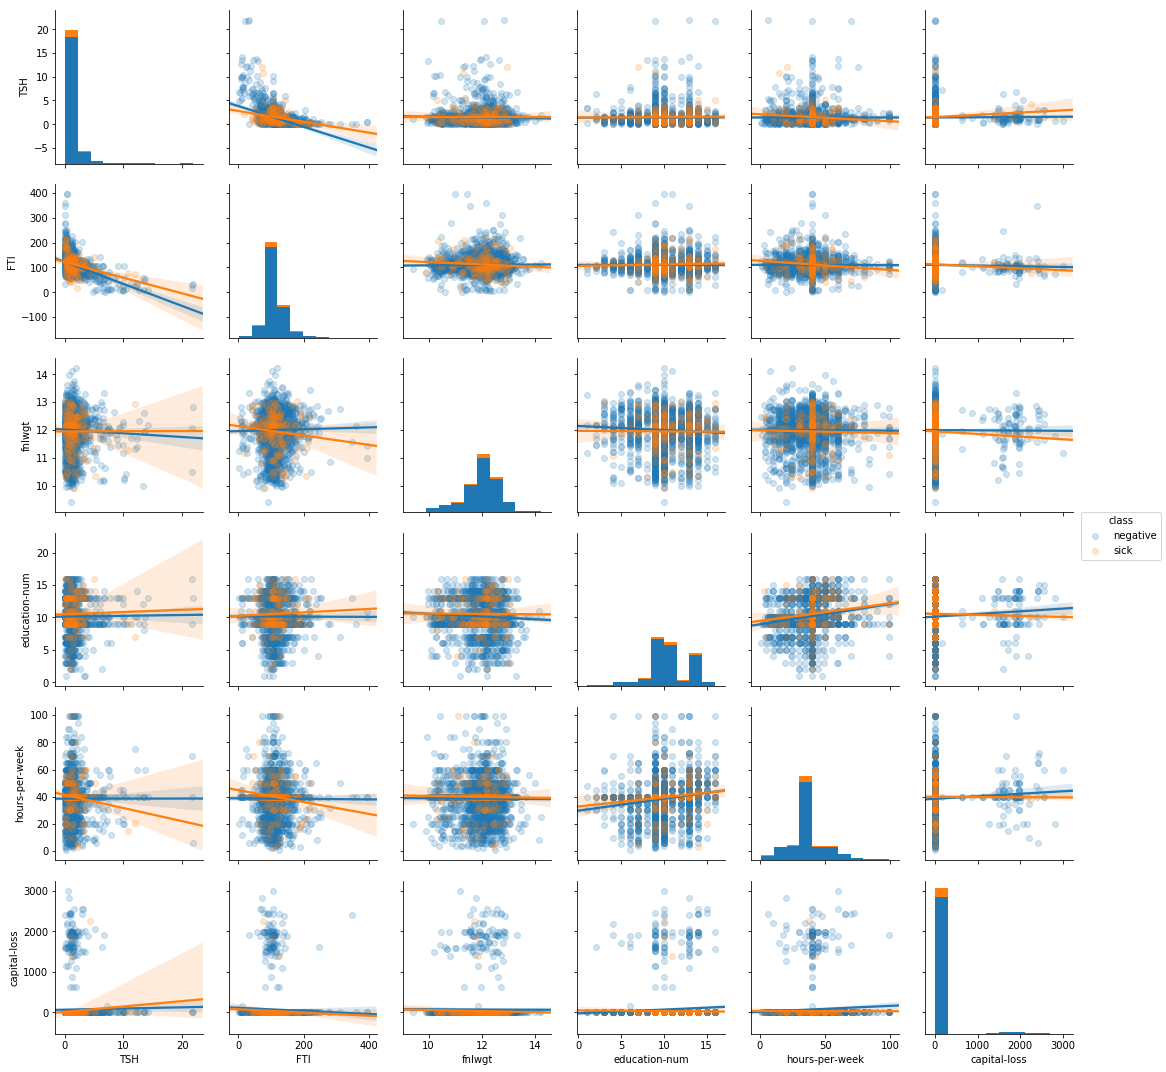

In [19]:
seaborn.pairplot(train[['TSH', 'FTI', 'fnlwgt','education-num','hours-per-week',
                        'class', 'capital-loss']], # nie je tu class number a age
                 hue="class", kind='reg', plot_kws={'scatter_kws': {'alpha': 0.2}})

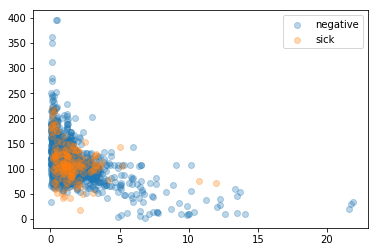

In [20]:
for name, group in train.groupby("class"):            # priklad ako vykreslit jeden z grafov vyssie
   plt.scatter(group['TSH'], group['FTI'], label=name, alpha=0.3)
plt.legend()

### Rozpoloženie číselných hodnôt v závislosti od atribútu class (nieje vidieť žiadny vzťah)

# FTI

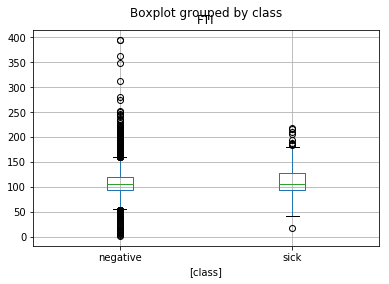

In [21]:
train[['class', 'FTI']].boxplot(by='class')

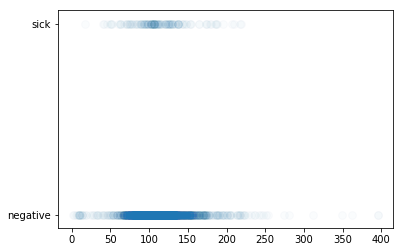

In [22]:
plt.scatter(train['FTI'], train['class'], alpha=0.02, s=60)

# TSH

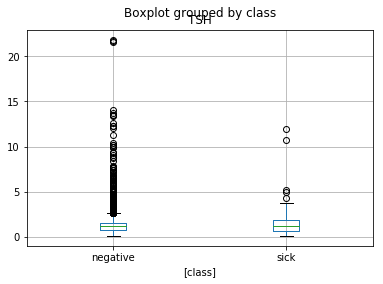

In [23]:
train[['class', 'TSH']].boxplot(by='class')

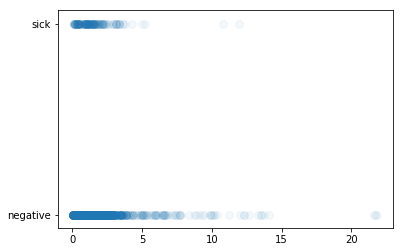

In [24]:
plt.scatter(train['TSH'], train['class'], alpha=0.05, s=60)

# fnlwgt

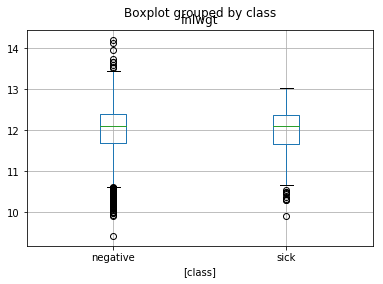

In [25]:
train[['class', 'fnlwgt']].boxplot(by='class')

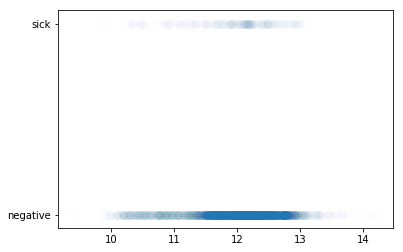

In [26]:
plt.scatter(train['fnlwgt'], train['class'], alpha=0.01, s=60)

# education-num

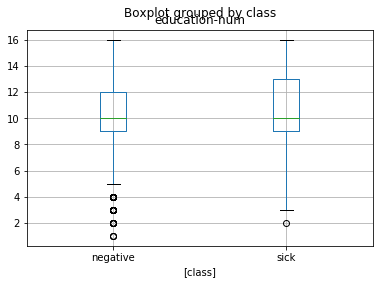

In [27]:
train[['class', 'education-num']].boxplot(by='class')

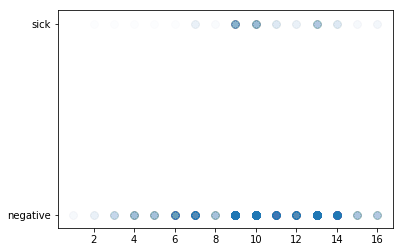

In [28]:
plt.scatter(train['education-num'], train['class'], alpha=0.01, s=60)

# capital-loss

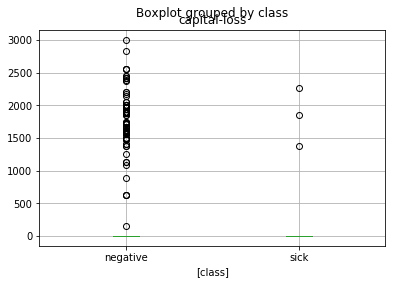

In [29]:
train[['class', 'capital-loss']].boxplot(by='class')

# hours-per-week

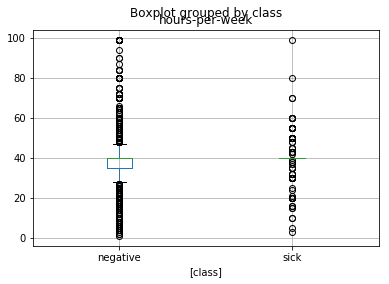

In [30]:
train[['class', 'hours-per-week']].boxplot(by='class')

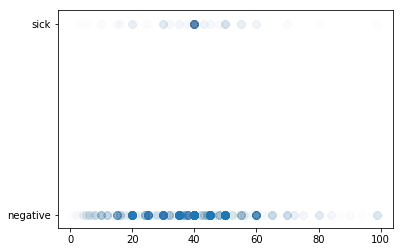

In [31]:
plt.scatter(train['hours-per-week'], train['class'], alpha=0.01, s=60)

# class number

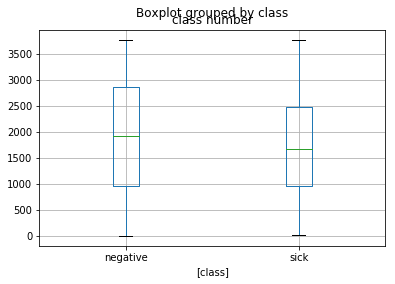

In [32]:
train[['class', 'class number']].boxplot(by='class')

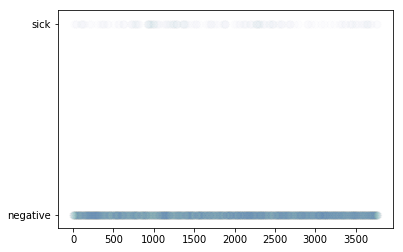

In [33]:
plt.scatter(train['class number'], train['class'], alpha=0.007, s=60)

In [214]:
pom = train[train['class'] == 'sick']      # len moja pomocka pre pravidla..
pom.iloc[:, 3:20].head()

sex on thyroxine query on thyroxine on antithyroid medication sick  \
15    M            f                  t                         f    f   
61    F            f                  f                         f    f   
72    M            f                  f                         f    f   
96    F            f                  f                         f    f   
129   F            f                  f                         f    f   

    pregnant thyroid surgery I131 treatment query hypothyroid  \
15         f               f              f                 f   
61         f               f              f                 f   
72         f               f              f                 f   
96         f               f              f                 t   
129        f               f              f                 f   

    query hyperthyroid lithium goitre tumor hypopituitary psych TSH measured  \
15                   f       f      f     f             f   NaN            f   
61                   f       f      f     f             f     f            t   
72                   f       f      f     f             f     f            t   
96                   f       f      f     f             f     t            t   
129                  f       f      f     f             f     f            t   

          TSH  
15   1.183216  
61   3.316625  
72   1.140175  
96   0.877496  
129  1.760682

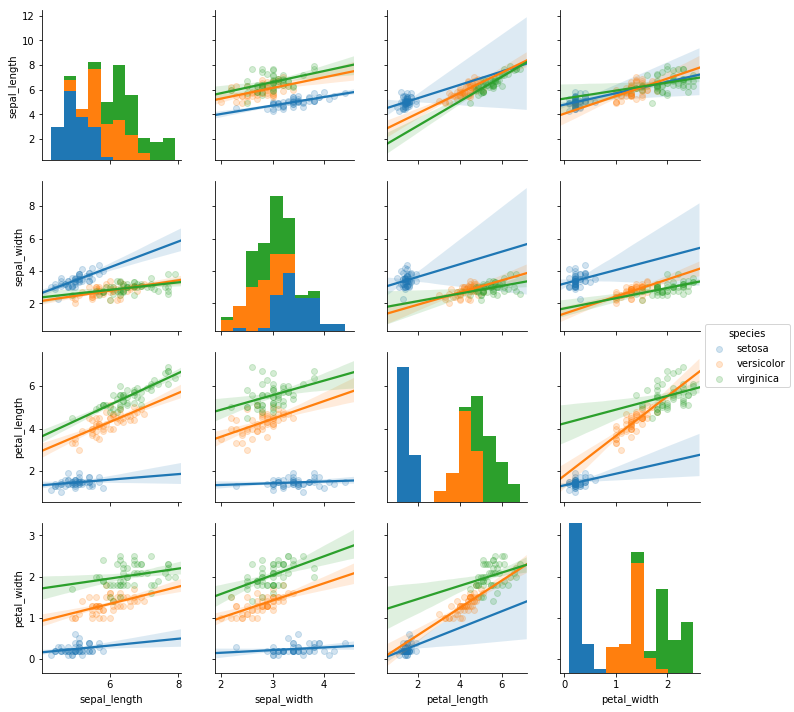

In [183]:
iris = seaborn.load_dataset("iris")      # ukazka ako su vidiet vztahy tu, ale pri nasom vobec
seaborn.pairplot(iris, hue="species", kind='reg', plot_kws={'scatter_kws': {'alpha': 0.2}})